In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qclab.simulation as simulation
from qclab.models.donor_bridge_acceptor import DonorBridgeAcceptorModel
from qclab.algorithms.mf import MeanFieldDynamics
from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray

In [2]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)

sim.num_branches = 3
sim.num_trajs = 1
sim.tmax=1+int(0.5/0.0260677)
sim.dt=1/(10*sim.w[-1])
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:21:31,911	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-15 13:21:41,832 E 1156787 1156809] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-21-30_313833_1156671 is over 95% full, available space: 18836582400; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:21:51,852 E 1156787 1156809] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-21-30_313833_1156671 is over 95% full, available space: 18836393984; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:22:01,878 E 1156787 1156809] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-21-30_313833_1156671 is over 95% full, available space: 18836307968; capacity: 493949374464. Object creation will fail if spilling is required.
100%|██████████| 3/3 [00:57<00:00, 19.12s/it]


In [7]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)

sim.num_branches = 3
sim.num_trajs = 1
sim.tmax=1+int(0.5/0.0260677)
sim.dt_bath=1/(10*sim.w[-1])
sim.dt=2*sim.dt_bath
sim.sh_deterministic=True
sim.pab_cohere = False
sim.dmat_const = 1
sim.calc_cfssh_obs = True
sim.gauge_fix = 0

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh1 = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-10 11:53:04,788	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 3/3 [00:33<00:00, 11.15s/it]


In [8]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)
sim.dynamics_method='CFSSH'
sim.num_branches = 3
sim.num_trajs = 1
sim.tmax=1+int(0.5/0.0260677)
sim.dt_bath=1/(10*sim.w[-1])
sim.dt=2*sim.dt_bath
sim.sh_deterministic=True
sim.pab_cohere = False
sim.dmat_const = 0
sim.calc_cfssh_obs = True
sim.gauge_fix = 0

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh0 = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-10 11:53:41,756	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 3/3 [00:33<00:00, 11.17s/it]


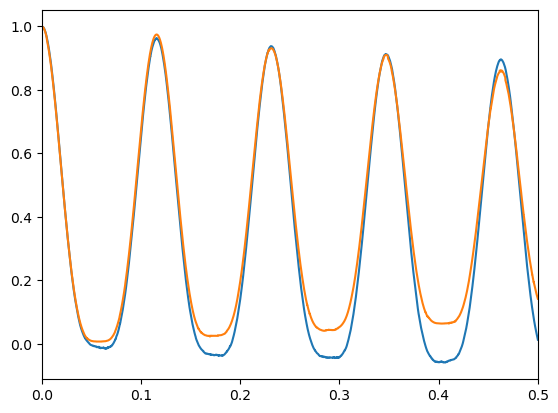

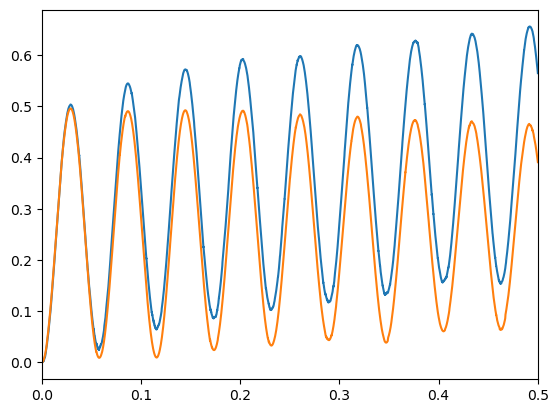

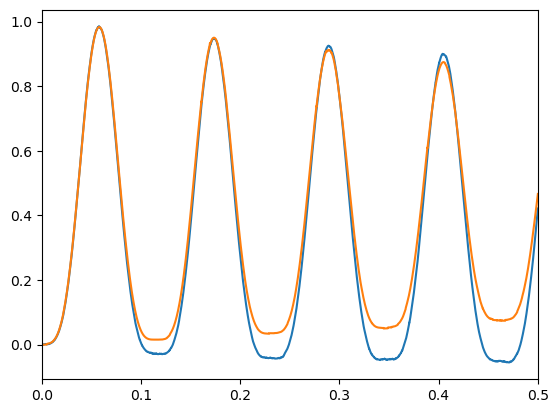

In [24]:
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['rho_db_fssh']))
t_ps = data_fssh.data_dic['t']*0.0260677
ntraj = np.sum(pops_fssh[0])
t_ps = t_ps/ntraj
pops_fssh = pops_fssh/ntraj


pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['rho_db_cfssh']))
t_ps = data_cfssh.data_dic['t']*0.0260677
ntraj = np.sum(pops_cfssh[0])
t_ps = t_ps/ntraj
pops_cfssh = pops_cfssh/ntraj

plt.plot(t_ps,pops_fssh[:,0])
plt.plot(t_ps,pops_cfssh[:,0])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_fssh[:,1])
plt.plot(t_ps,pops_cfssh[:,1])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_fssh[:,2])
plt.plot(t_ps,pops_cfssh[:,2])
plt.xlim([0,0.5])
plt.show()